### Transient Heat Conduction (Boundary Value Problem - BVP)

$\frac{∂T}{∂t}=k \nabla^2T$

$\frac{∂T}{∂t}(z,t)=k\frac{∂^2T}{∂z^2}(z,t)$ (1D)

At this point two questions arise:\
    1) How does the temperature change as time progresses?\
    2) How does the temperature change as we move along the rod?
    
Note that the way any one of these values changes depends on the other values.

We approximate the time derivative as:

$\frac{∂T}{∂t}|_{i,j} = \frac{T_{i,j+1}-T_{i,j}}{\Delta t}$

$\frac{∂^2T}{∂t^2}|_{i,j} = \frac{T_{i,j+1}-2T_{i,j}+T_{i,j-1}}{\Delta t^2}$


**Data**

Length of wall: L = 1 m\
Initial condition: T$_0$(z) = 150$^o$C\
Left boundary condition: T(0, t) = 100$^o$C\
Right boundary condition: T(L, t) = 200$^o$C

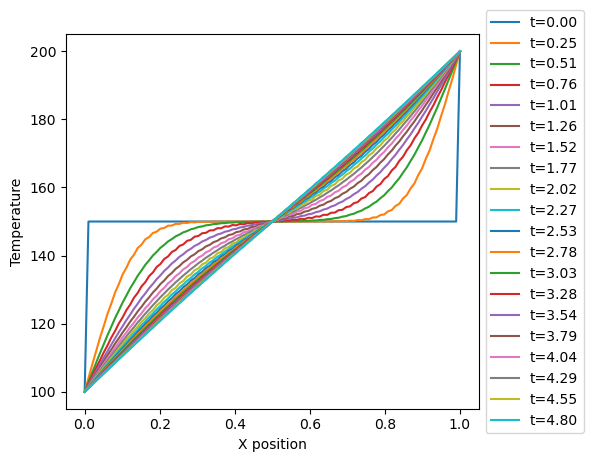

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 100  # number of points to discretize
L = 1.0
X = np.linspace(0, L, N) # position along the rod
h = L / (N - 1)

k = 0.02

def odefunc(t, u):
    dudt = np.zeros(X.shape)

    dudt[0] = 0 # constant at boundary condition
    dudt[-1] = 0

    # now for the internal nodes
    for i in range(1, N-1):
        dudt[i] = k * (u[i + 1] - 2*u[i] + u[i - 1]) / h**2

    return dudt

init = 150.0 * np.ones(X.shape) # initial temperature
init[0] = 100.0  # one boundary condition
init[-1] = 200.0 # the other boundary condition

tspan = np.linspace(0.0, 5.0, 100)
sol = solve_ivp(odefunc, (tspan[0], tspan[-1]), init, t_eval=tspan)


for i in range(0, len(tspan), 5):
    plt.plot(X, sol.y.T[i], label='t={0:1.2f}'.format(tspan[i]))


# put legend outside the figure
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('X position')
plt.ylabel('Temperature')

# adjust figure edges so the legend is in the figure
plt.subplots_adjust(top=0.89, right=0.77)

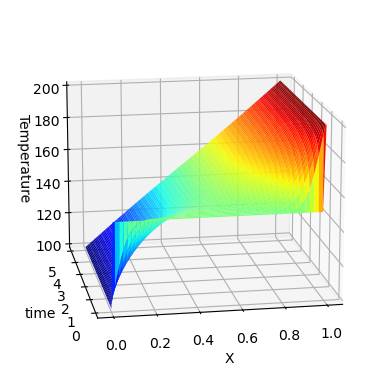

In [4]:
# Make a 3d figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

SX, ST = np.meshgrid(tspan, X)
ax.plot_surface(ST, SX, sol.y, cmap='jet')
ax.set_xlabel('X')
ax.set_ylabel('time')
ax.set_zlabel('Temperature')
ax.view_init(elev=15, azim=-100) # adjust view so it is easy to see;